## Часть 1

### 1. Использовать функцию для создания набора данных.

Функция для создания набора данных принимает на вход следующие параметры: n - число объектов в каждой группе, seed - зерно, необходимое для воспроизводимости случайных значений.

In [538]:
import numpy as np
import pandas as pd

def make_data(n, seed):
    np.random.seed(seed)
    shift_matrix = np.array([[3, 3],
    [6, 9],
    [9, 3]])
    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])
    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
    columns=['x', 'y'])
    df = df.sample(frac=1.0)
    return df

В результате применения получается DataFrame , содержащий заданное число объектов в каждой группе (всего 3 группы) с двумя признаками: 'x' и 'y'.

### 2. Получить с помощью этой функции два набора данных train и test.

Далее, с помощью этой функции были получены два набора данных train и test. Выборка train состоит из 75 объектов, а выборка test из 25 объектов.

In [542]:
train = make_data(75, 42)
test = make_data(25, 52)

### 3. Провести стандартизацию данных.

Далее, для этих данных была проведена стандартизация.

In [545]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

scaled_train = ss.fit_transform(train)
scaled_train = pd.DataFrame(data=scaled_train, columns=train.columns)

scaled_test = ss.transform(test)
scaled_test = pd.DataFrame(data=scaled_test, columns=test.columns)

С помощью StandardScaler данные были приведены к единому виду с математическим ожиданием = 0 и дисперсией = 1.

### 4. С помощью метода .fit_predict обучить модель для кластеризации методом Kmeans для трёх кластеров. Получить метки кластеров.

Далее, в результате применения метода fit_predict() была обучена модель KMeans для трех кластеров. Для получения меток кластеров, в стандартизированный датафрейм train была добавлена колонка с результатом кластеризации.

In [549]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42)

clusters3 = model.fit_predict(scaled_train)

scaled_train['cluster_3'] = clusters3

### 5. Провести визуализацию кластеров с помощью scatter . Пометить на графике центры кластеров. Покрасить объекты из разных кластеров разными цветами.

Далее, для визуализации кластеров был использован метод scatterplot() библиотеки seaborn. Объекты из разных кластеров были покрашены разными цветами, на графике были помечены центры кластеров.

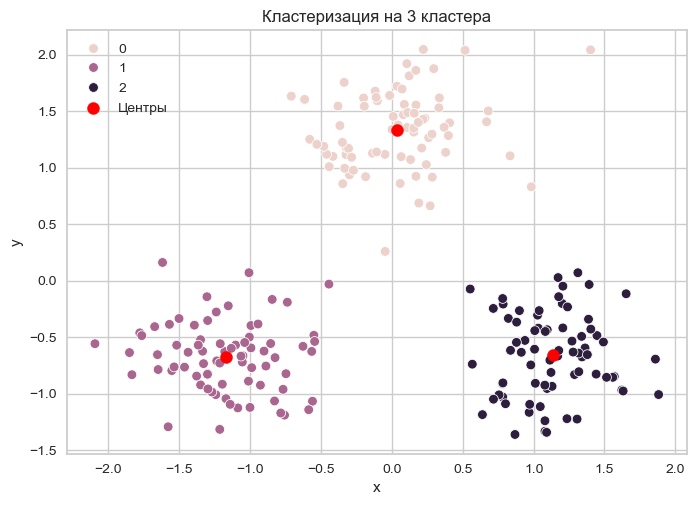

In [552]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = scaled_train['x'], y = scaled_train['y'], hue = scaled_train['cluster_3'])

cluster_center = model.cluster_centers_

plt.scatter(cluster_center[:, 0], cluster_center[:, 1], s=75, c='red',label='Центры')

plt.legend()

plt.title('Кластеризация на 3 кластера')

plt.show()

### 6. Использовать тестовые данные test и выполнить предсказание с помощью predict . Построить графики для тестовых данных. Пометить на графике центры кластеров. Покрасить объекты из разных кластеров разными цветами.

Далее, было выполнено предсказание на тестовых данных test, с помощью predict. Был построен график для тестовых данных, помечены центры кластеров. Объекты из разных кластеров были покрашены разными цветами.

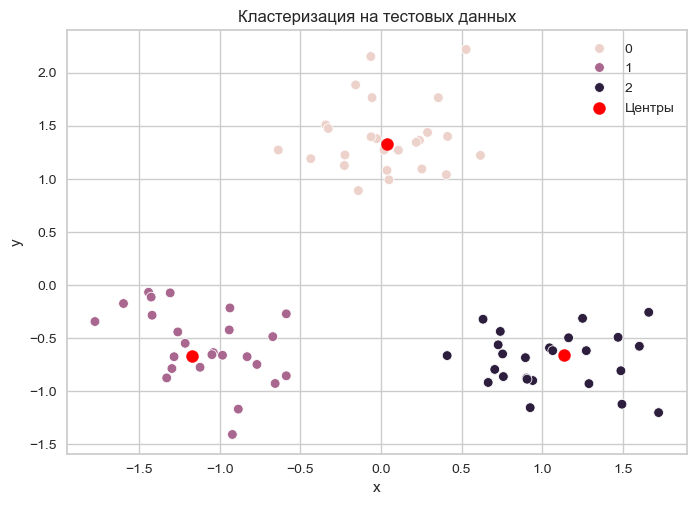

In [555]:
test_cluster3 = model.predict(scaled_test)

cluster_center = model.cluster_centers_

scaled_test['cluster_3'] = test_cluster3

sns.scatterplot(x=scaled_test['x'], y=scaled_test['y'], hue=scaled_test['cluster_3']) 

plt.scatter(cluster_center[:, 0], cluster_center[:, 1], s=75, c='red',label='Центры') 

plt.title("Кластеризация на тестовых данных")
plt.legend()
plt.show()

Визуально кластеризация выполнена верно, центры кластеров находятся в правильных местах, данные действительно расположены в соотвествии с проведенной кластеризацей.

### 7. Подсчитать коэффициент силуэта.

Далее, был подсчитан коэффициент силуэта.

In [559]:
from sklearn.metrics import silhouette_score

silhouette3 = silhouette_score(scaled_test, test_cluster3)

print(f'Коэффициент силуэта: {silhouette3:.3f}')

Коэффициент силуэта: 0.760


Полученный коэффициент силуэта, равный 0.764 показывает, что, в среднем, каждый объект довольно сильно похож на другие объекты своего кластера. Данный показатель находится в диапазоне от -1 до +1, при этом оценка около 0 указывает на перекрывающиеся кластеры. Выполненная кластеризация является довольно неплохой.
Визуально это действительно так, центры кластеров находятся в правильных местах, данные действительно расположены в соотвествии с проведенной кластеризацей.

### 8. Повторить пункты 4-7 для n clusters = 2 и n clusters = 4 .Сравнить результаты и сделать выводы.

Далее, часть предыдущих пунктов были повторены для n_clusters = 2.

Коэффициент силуэта для 2 кластеров: 0.595


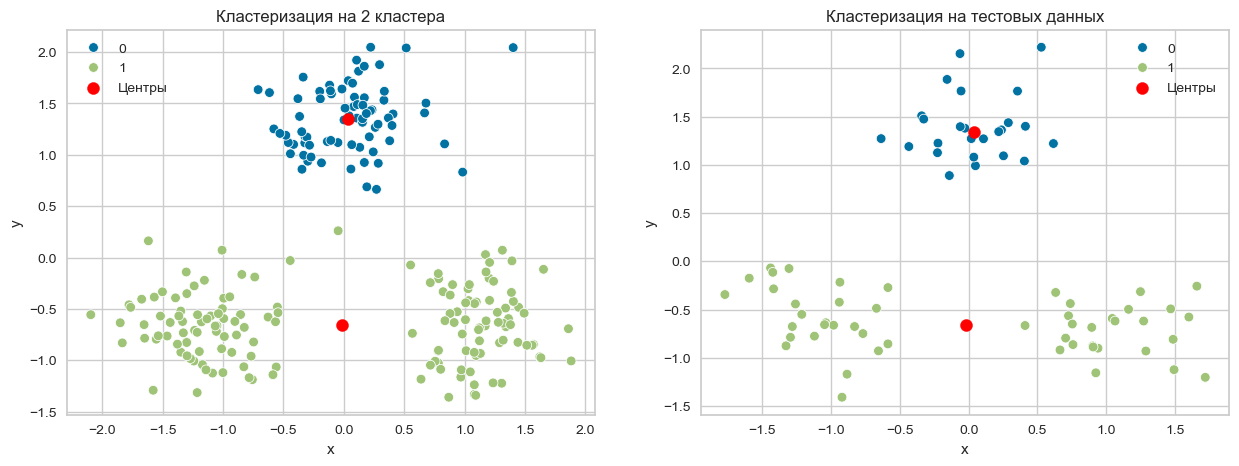

In [563]:
model2 = KMeans(n_clusters=2, random_state=42)

cluster2 = model2.fit_predict(scaled_train.drop(['cluster_3'], axis=1))

scaled_train['cluster_2'] = cluster2

test_cluster2 = model2.predict(scaled_test.drop(['cluster_3'], axis=1))

cluster_center2 = model2.cluster_centers_

scaled_test['cluster_2'] = test_cluster2

silhouette2 = silhouette_score(scaled_test, test_cluster2)

print(f'Коэффициент силуэта для 2 кластеров: {silhouette2:.3f}')

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)

sns.scatterplot(x=scaled_train['x'], y=scaled_train['y'], hue=scaled_train['cluster_2'])
plt.scatter(cluster_center2[:, 0], cluster_center2[:, 1], s=75, c='red',label='Центры') 
plt.title('Кластеризация на 2 кластера')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=scaled_test['x'], y=scaled_test['y'], hue=scaled_test['cluster_2'])
plt.scatter(cluster_center2[:, 0], cluster_center2[:, 1], s=75, c='red',label='Центры') 
plt.title("Кластеризация на тестовых данных")

plt.legend()
plt.show()

В результате кластеризации на 2 кластера, можно сделать следующие выводы:
1. Визуально кластеры разделены относительно неплохо, наблюдается логика в разделении на 2 кластера. Однако, центры кластеров не совпадают с местами скопления данных, поэтому выбранное количество кластеров не является наиболее оптимальным.
2. Коэффициент силуэта для 2 кластеров равен 0.518, что является относительно неплохим показателем в рамках диапазона коэффициента силуэта. Однако визуально так нельзя сказать, данные не очень хорошо разделены на кластеры.

Далее, часть предыдущих пунктов были повторены для n_clusters = 4.

Коэффициент силуэта для 4 кластеров: 0.787


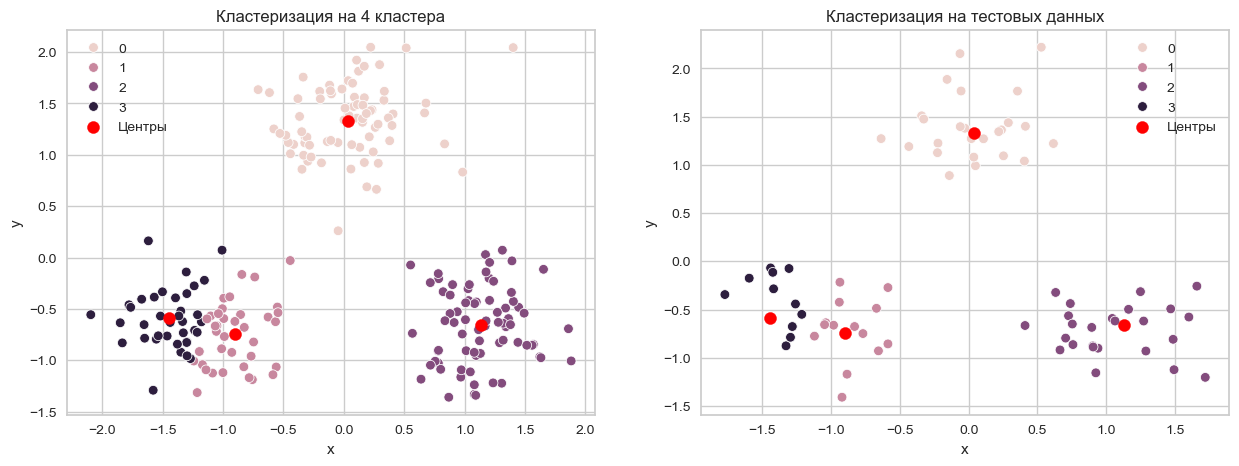

In [566]:
model4 = KMeans(n_clusters=4, random_state=42)

cluster4 = model4.fit_predict(scaled_train.drop(['cluster_3', 'cluster_2'], axis=1))

scaled_train['cluster_4'] = cluster4

test_cluster4 = model4.predict(scaled_test.drop(['cluster_3', 'cluster_2'], axis=1))

cluster_center4 = model4.cluster_centers_

scaled_test['cluster_4'] = test_cluster4

silhouette4 = silhouette_score(scaled_test, test_cluster4)

print(f'Коэффициент силуэта для 4 кластеров: {silhouette4:.3f}')

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)

sns.scatterplot(x=scaled_train['x'], y=scaled_train['y'], hue=scaled_train['cluster_4'])
plt.scatter(cluster_center4[:, 0], cluster_center4[:, 1], s=75, c='red',label='Центры') 
plt.title('Кластеризация на 4 кластера')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=scaled_test['x'], y=scaled_test['y'], hue=scaled_test['cluster_4'])
plt.scatter(cluster_center4[:, 0], cluster_center4[:, 1], s=75, c='red',label='Центры') 
plt.title("Кластеризация на тестовых данных")

plt.legend()
plt.show()

В результате кластеризации на 4 кластера, можно сделать следующие выводы:
1. Визуально кластеры разделены относительно неплохо, наблюдается логика в разделении на 4 кластера. Центры кластеров расположены с местами скопления данных, поэтому выбранное количество кластеров можно считать оптимальным.
2. Коэффициент силуэта для 4 кластеров равен 0.739, что является довольно неплохим показателем в рамках диапазона коэффициента силуэта, особенно в сравнении с коэффициентами силуэта для предыдущей кластеризацией на 2. Визуально коэффициент подтверждает свое значение, данные относительно хорошо разделены на кластеры.

### 9. Построить график по “методу локтя” и сделать выводы.

Далее, был построен график по "методу локтя".

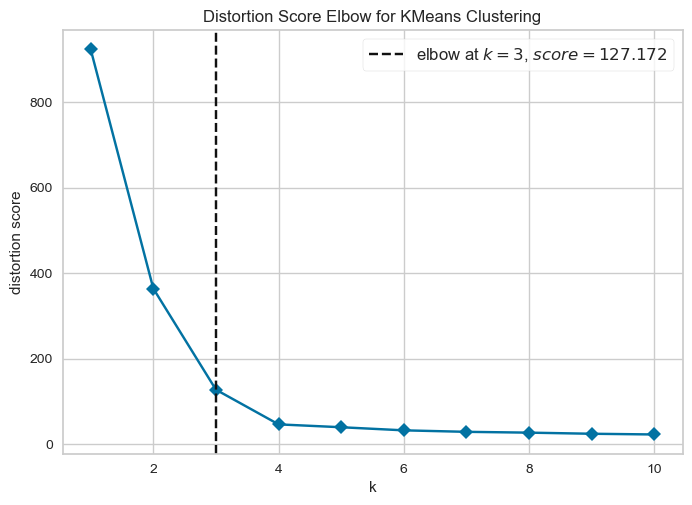

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [570]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,11), timings=False)
visualizer.fit(scaled_train)
visualizer.show()

В результате построения графика по методу "локтя" можно сделать вывод, что оптимальное количество кластеров для данных - 3. Увеличение количества кластеров после количества = 3 уже является неэффективным. Локоть хорошо виден, данные имеют 3 естественных кластера. В качестве оценки используется distortion score, которая вычисляется как суммы квадратов расстояний от точек внутри каждого кластера до их центроида. Чем меньше значение distortion_score, тем плотнее точки сгруппированы вокруг своих центроидов, а значит, кластеризация лучше.

## Часть 2. Выполнить кластеризацию по вариантам.

### 1. Загрузить набор данных.

Затем, были загружены данные, согласно варианту индивидуального задания.

In [575]:
df = pd.read_csv('5gym_churn.csv')

In [576]:
df.head(5)

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

Информация о клиентах фитнес клуба:
1. Пол
2. Близкое расположение
3. Сотрудник компании партнера
4. По промо друзей
5. Указан ли телефон
6. Длительность текущего абонемента
7. Посещение групповых занятий
8. Возраст
9. Средние траты на дополнительные услуги
10. Количество месяцев до окончания абонемента
11. время с момента первого обращения в фитнесцентр (в месяцах)
12. средняя частота посещений в неделю за все время с начала действия абонемента
13. средняя частота посещений в неделю за предыдущий месяц
14. Churn – факт ухода из клуба

### 2. Провести предварительную обработку данных.

Далее, была выведена информация об имеющихся данных. Пропусков нет, все типы данных признаков соответствуют описанию датасета.

In [580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Далее, была выведена информация о числовых данных датасета. Выбросов нет, данные находятся в допустимых диапазонах.

In [582]:
df.describe()

gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.943728               4.322750     3.724750   
std                       96.355602               4.191297     3.749267   
min                        0.148205               1.000000     0.000000   
25%                       68.868830               1.000000     1.000000   
50%                      136.220159               1.000000     3.000000   
75%                      210.949625               6.000000     5.000000   
max                      552.590740              12.000000    31.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.879020                           1.767052   
std                     0.972245                           1.052906   
min                     0.000000                           0.000000   
25%                     1.180875                           0.963003   
50%                     1.832768                           1.719574   
75%                     2.536078                           2.510336   
max                     6.023668                           6.146783   

             Churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

### 3. Выделить целевую переменную, которую необходимо предсказать. Не включать эту целевую переменную в модель. Построить матрицу диаграмм рассеяния, выделив значения целевой переменной разными цветами.

Далее, была выделена целевая переменная, которую необходимо предсказать. Целевая переменная - churn, факт ухода из клуба.

In [585]:
y = df['Churn']

Далее, была построена матрица диаграмм рассеяния, с выделением целевой переменной разными цветами.

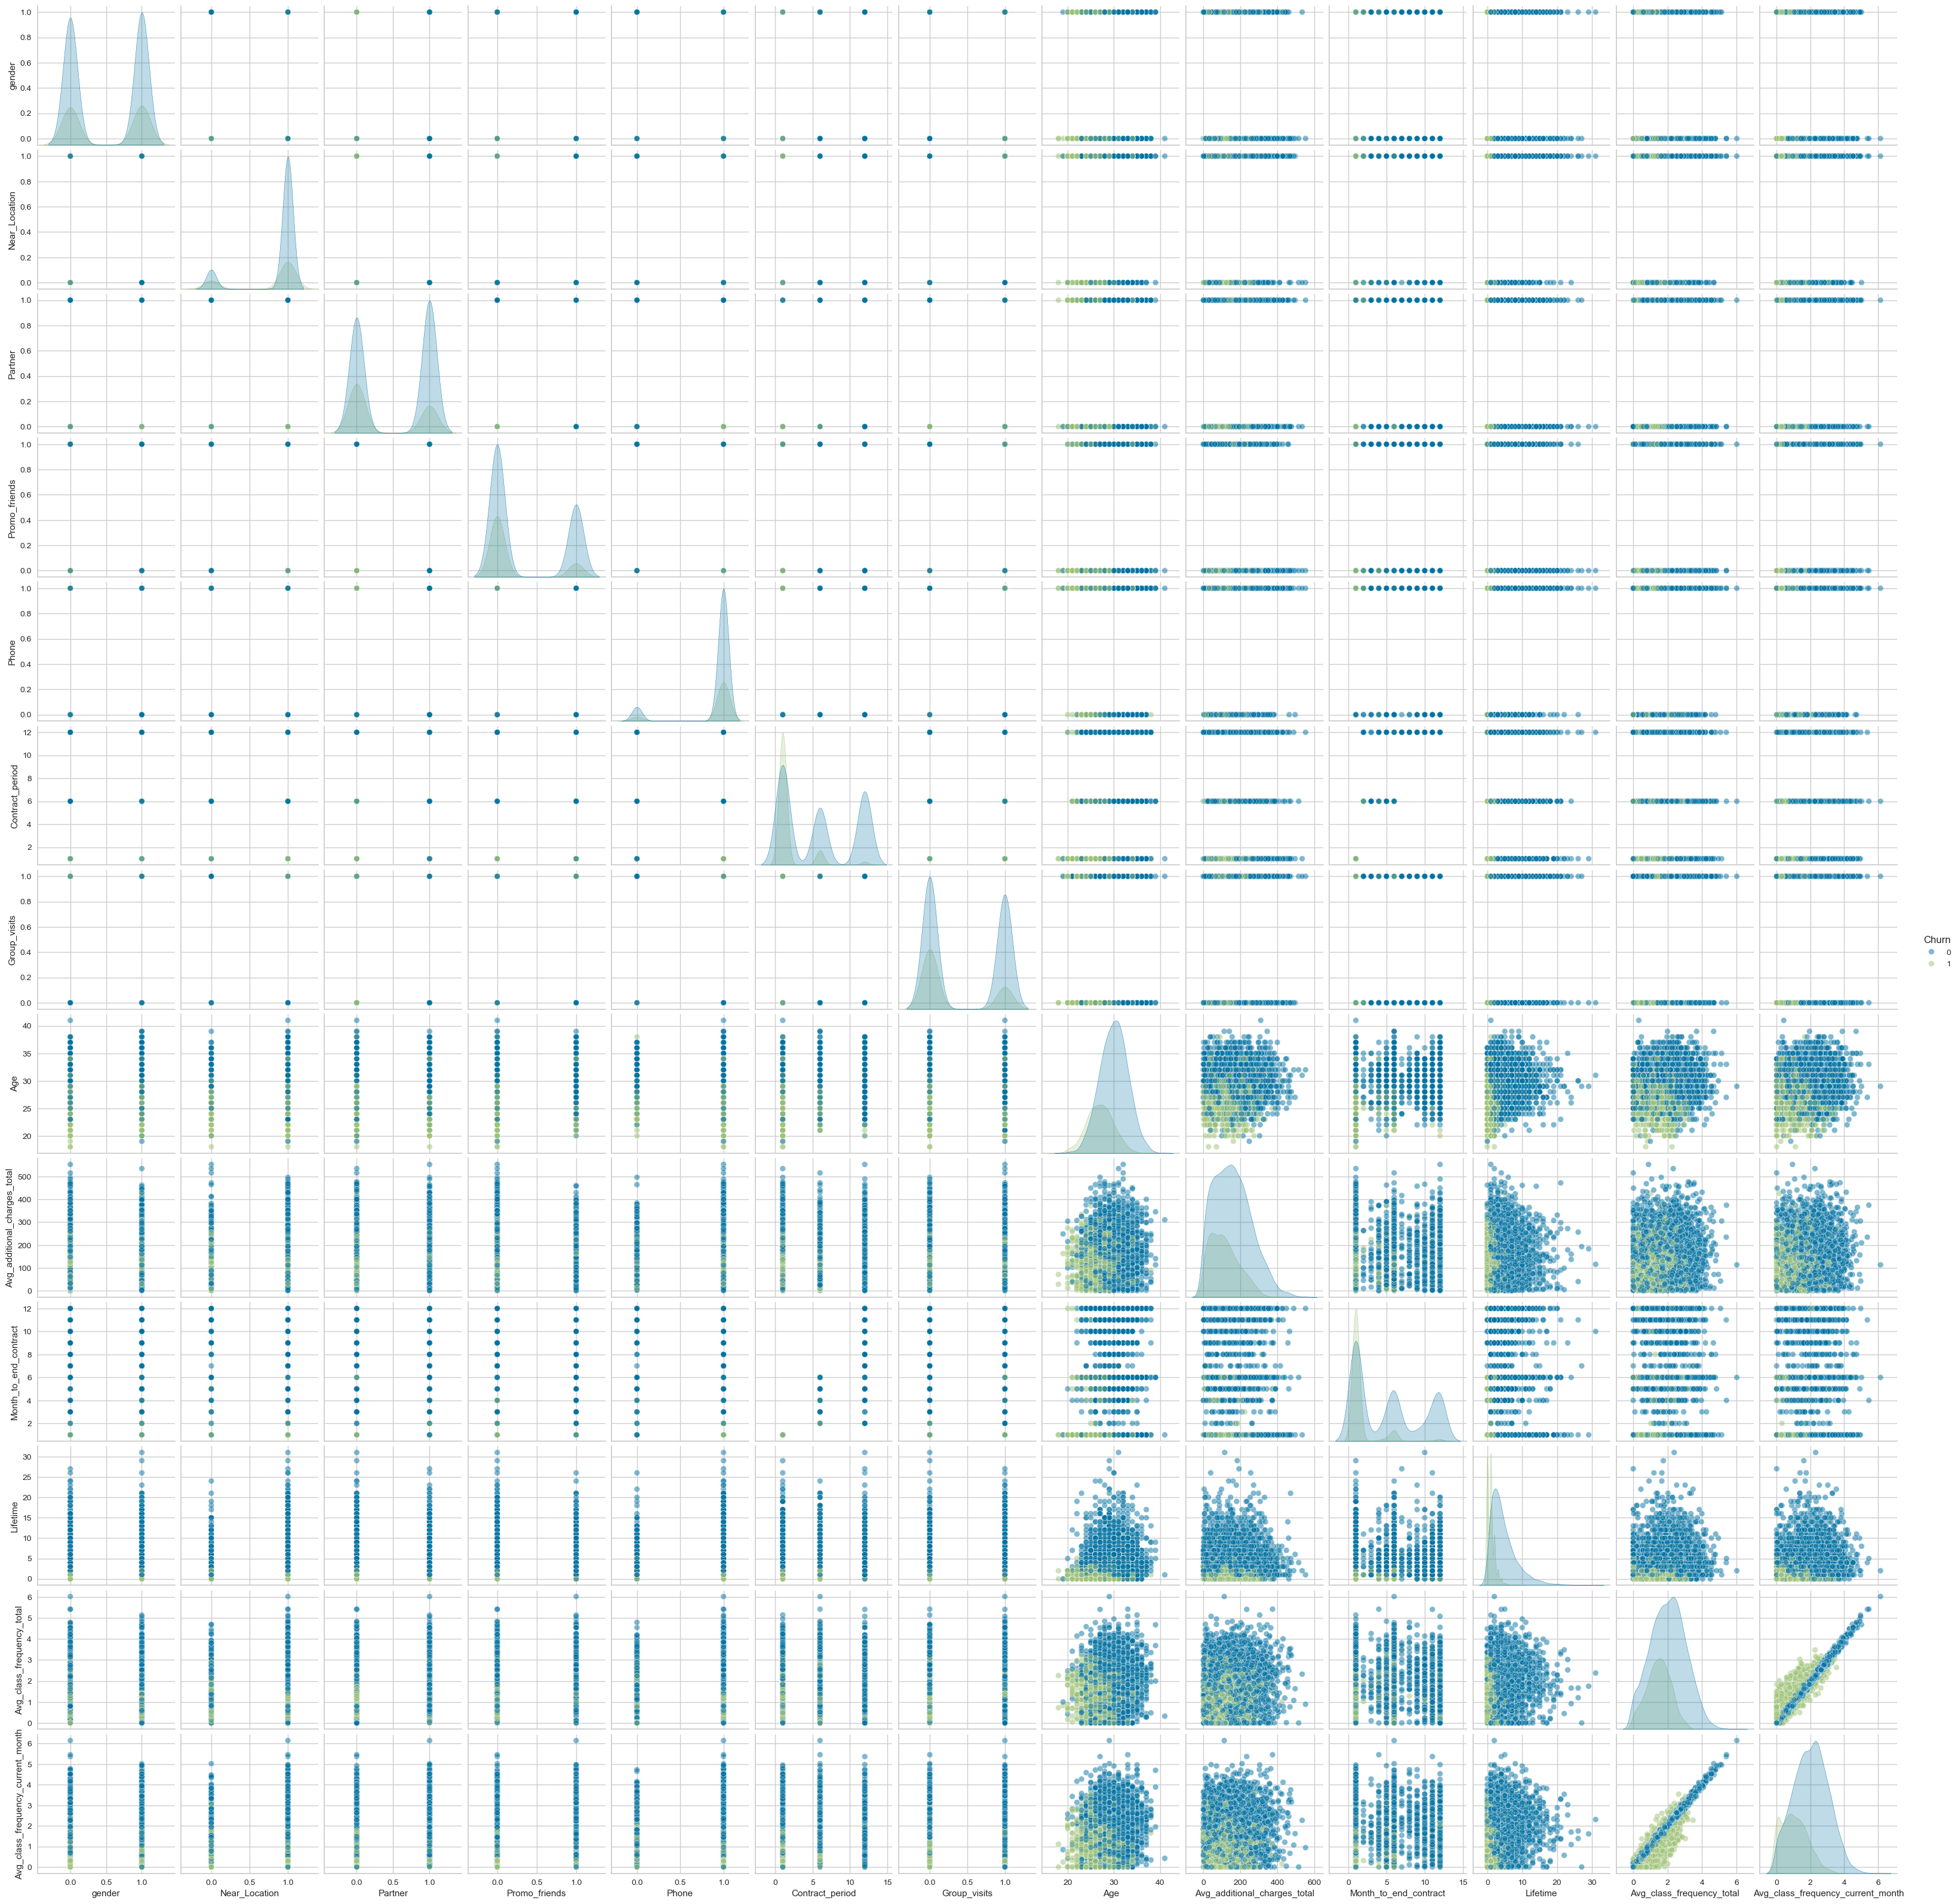

In [587]:
sns.pairplot(df, hue='Churn', plot_kws={'alpha':0.5})

В результате построения матрицы диаграмм рассеяния можно выделить конкретное разделение данных на два класса. Особенно заметно на диаграммах рассеяния зависимости Age от Lifetime, Avg_class_frequency_total, Avg_class_frequency_month и Avg_additional_charges_total.

### 4. Выполнить стандартизацию числовых данных с помощью StandardScaler.

Далее, была выполнена стандартизация числовых данных с помощью StandardScaler.

In [591]:
X = df.drop(columns = 'Churn')
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

### 5. Выполнить кластеризацию объектов методом k-means . Подобрать оптимальное количество кластеров.

Далее, было подобрано оптимальное количество кластеров. Оптимальное количество кластеров было подобрано методом локтя, с использованием yellowbrick KElbowVisualixer.

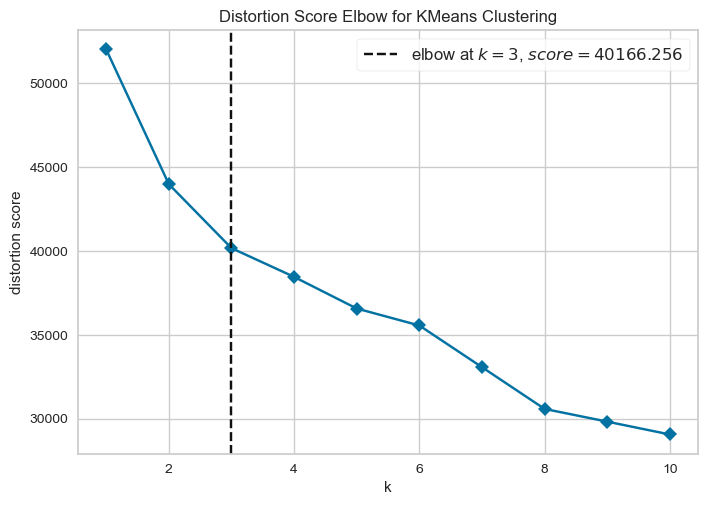

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [594]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,11), timings=False)
visualizer.fit(X_scaled)
visualizer.show()

В результате визуализации метода локтя, можно заметить, что резких спадов не наблюдалось, однако distortion score на один шаг перестал резко снижаться на k = 3. Следовательно, оптимальное число кластеров - 3.

Далее, была выполнена кластеризация объектов методов k-means, с учетом оптимального числа кластеров.

In [597]:
model = KMeans(n_clusters=3, random_state=42)

clusters = model.fit_predict(X_scaled)

### 6. Определить объекты, относящиеся к одному кластеру и сделать выводы о каждом кластере. Подсчитать средние показатели по каждому признаку каждого кластера.

Далее, были определены объекты, относящиеся к одному кластеру.

In [600]:
X['cluster'] = clusters
first_cluster = X[X['cluster'] == 0]
second_cluster = X[X['cluster'] == 1]
third_cluster = X[X['cluster'] == 2]

Далее, был описан первый кластер. Первый кластер содержит в себе 1653 объекта, Средние показатели по признакам кластера:
- Пол кластера составляет пополам (в кластере половина мужчин, половина женщин);
- У большинства объектов кластера присутствует близкое расположение (76 процентов)
- Меньшая часть объектов кластера являются сотрудниками компании партнера (38 процентов являются сотрудниками);
- По промо друзей пришла примерно малая часть кластера (18 процентов);
- У 90 процентов объектов указан телефон;
- Средняя Длительность текущего абонемента составляет 1.8;
- Меньшая часть объектов посещает групповые занятия;
- Средний возраст объектов (людей) первого кластера составляет 28 лет;
- Средние траты на дополнительные услуги составляют 128;
- Количество месяцев до окончания абонемента составляет примерно 2 месяца (1.7);
- Время с момента первого обращения в фитнесцентр (в месяцах) составляет примерно 2 месяца (2.2);
- Средняя частота посещений в неделю за все время с начала действия абонемента равна примерно 1 (1.2);
- Средняя частота посещений в неделю за предыдущий месяц равна примерно 1.

In [602]:
first_cluster.mean()

gender                                 0.485783
Near_Location                          0.759831
Partner                                0.376891
Promo_friends                          0.182698
Phone                                  0.907441
Contract_period                        1.859649
Group_visits                           0.289776
Age                                   28.090139
Avg_additional_charges_total         128.388804
Month_to_end_contract                  1.771325
Lifetime                               2.238355
Avg_class_frequency_total              1.229208
Avg_class_frequency_current_month      0.972494
cluster                                0.000000
dtype: float64

In [603]:
first_cluster.describe()

gender  Near_Location      Partner  Promo_friends        Phone  \
count  1653.000000    1653.000000  1653.000000    1653.000000  1653.000000   
mean      0.485783       0.759831     0.376891       0.182698     0.907441   
std       0.499949       0.427315     0.484754       0.386536     0.289901   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       0.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       0.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      1653.000000   1653.000000  1653.000000   
mean          1.859649      0.289776    28.090139   
std           1.949644      0.453796     3.184364   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    26.000000   
50%           1.000000      0.000000    28.000000   
75%           1.000000      1.000000    30.000000   
max          12.000000      1.000000    41.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   1653.000000            1653.000000  1653.000000   
mean                     128.388804               1.771325     2.238355   
std                       87.747502               1.771369     2.654669   
min                        0.148205               1.000000     0.000000   
25%                       58.358479               1.000000     1.000000   
50%                      116.024721               1.000000     1.000000   
75%                      181.459716               1.000000     3.000000   
max                      515.392606              12.000000    24.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  cluster  
count                1653.000000                        1653.000000   1653.0  
mean                    1.229208                           0.972494      0.0  
std                     0.616559                           0.625573      0.0  
min                     0.000000                           0.000000      0.0  
25%                     0.794658                           0.474269      0.0  
50%                     1.267137                           0.986939      0.0  
75%                     1.685869                           1.459101      0.0  
max                     2.856149                           2.609864      0.0

Далее, был описан второй кластер. Второй кластер содержит в себе 1155 объектов, Средние показатели по признакам кластера:
- Пол кластера составляет пополам (в кластере половина мужчин, половина женщин);
- У большинства объектов кластера присутствует близкое расположение (87 процентов)
- Большинство объектов кластера не являются сотрудниками компании партнера (34 процентов являются сотрудниками);
- По промо друзей пришла малая часть кластера (22 процентов);
- У 90 процентов объектов указан телефон;
- Средняя Длительность текущего абонемента составляет 2.5;
- Примерно половина объектов посещает групповые занятия (45 процентов);
- Средний возраст объектов (людей) первого кластера составляет 30 лет;
- Средние траты на дополнительные услуги составляют 158;
- Количество месяцев до окончания абонемента составляет примерно 2 месяца (2.3);
- Время с момента первого обращения в фитнесцентр (в месяцах) составляет примерно 5 месяцев (4.8);
- Средняя частота посещений в неделю за все время с начала действия абонемента равна примерно 3 (2.7);
- Средняя частота посещений в неделю за предыдущий месяц равна примерно 3 (2.7).

In [605]:
second_cluster.mean()

gender                                 0.546320
Near_Location                          0.870130
Partner                                0.348052
Promo_friends                          0.225974
Phone                                  0.903896
Contract_period                        2.485714
Group_visits                           0.454545
Age                                   30.009524
Avg_additional_charges_total         158.140635
Month_to_end_contract                  2.314286
Lifetime                               4.849351
Avg_class_frequency_total              2.736308
Avg_class_frequency_current_month      2.726562
cluster                                1.000000
dtype: float64

In [606]:
second_cluster.describe()

gender  Near_Location      Partner  Promo_friends        Phone  \
count  1155.000000    1155.000000  1155.000000    1155.000000  1155.000000   
mean      0.546320       0.870130     0.348052       0.225974     0.903896   
std       0.498065       0.336306     0.476559       0.418403     0.294861   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       0.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      1155.000000   1155.000000  1155.000000   
mean          2.485714      0.454545    30.009524   
std           2.478069      0.498145     3.084441   
min           1.000000      0.000000    21.000000   
25%           1.000000      0.000000    28.000000   
50%           1.000000      0.000000    30.000000   
75%           6.000000      1.000000    32.000000   
max          12.000000      1.000000    39.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   1155.000000            1155.000000  1155.000000   
mean                     158.140635               2.314286     4.849351   
std                      100.266436               2.173759     4.131482   
min                        0.362153               1.000000     0.000000   
25%                       78.376302               1.000000     2.000000   
50%                      148.418053               1.000000     4.000000   
75%                      222.211560               4.500000     7.000000   
max                      534.256182              11.000000    29.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  cluster  
count                1155.000000                        1155.000000   1155.0  
mean                    2.736308                           2.726562      1.0  
std                     0.699549                           0.716016      0.0  
min                     0.764516                           0.843826      1.0  
25%                     2.250850                           2.222773      1.0  
50%                     2.639120                           2.631576      1.0  
75%                     3.164724                           3.172859      1.0  
max                     6.023668                           6.146783      1.0

Далее, был описан третий кластер. Третий кластер содержит в себе 1192 объекта, Средние показатели по признакам кластера:
- Пол кластера составляет пополам (в кластере половина мужчин, половина женщин);
- У большинства объектов кластера присутствует близкое расположение (94 процента)
- Большинство объектов кластера являются сотрудниками компании партнера (77 процентов являются сотрудниками);
- По промо друзей пришла примерно половина кластера (56 процентов);
- У 90 процентов объектов указан телефон;
- Средняя длительность текущего абонемента составляет 10.7;
- Примерно половина объектов посещает групповые занятия (54 процента);
- Средний возраст объектов (людей) первого кластера составляет 30 лет;
- Средние траты на дополнительные услуги составляют 161;
- Количество месяцев до окончания абонемента составляет примерно 10 месяцев (9.8);
- Время с момента первого обращения в фитнесцентр (в месяцах) составляет примерно 5 месяцев (4.7);
- Средняя частота посещений в неделю за все время с начала действия абонемента равна примерно 2;
- Средняя частота посещений в неделю за предыдущий месяц равна примерно 2.

In [608]:
third_cluster.mean()

gender                                 0.509228
Near_Location                          0.939597
Partner                                0.773490
Promo_friends                          0.562919
Phone                                  0.897651
Contract_period                       10.721477
Group_visits                           0.541107
Age                                   29.901846
Avg_additional_charges_total         161.825322
Month_to_end_contract                  9.807047
Lifetime                               4.696309
Avg_class_frequency_total              1.949465
Avg_class_frequency_current_month      1.939174
cluster                                2.000000
dtype: float64

In [609]:
third_cluster.describe()

gender  Near_Location      Partner  Promo_friends        Phone  \
count  1192.000000    1192.000000  1192.000000    1192.000000  1192.000000   
mean      0.509228       0.939597     0.773490       0.562919     0.897651   
std       0.500125       0.238331     0.418749       0.496234     0.303234   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     1.000000       0.000000     1.000000   
50%       1.000000       1.000000     1.000000       1.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      1192.000000   1192.000000  1192.000000   
mean         10.721477      0.541107    29.901846   
std           2.457964      0.498516     3.086701   
min           6.000000      0.000000    20.000000   
25%          12.000000      0.000000    28.000000   
50%          12.000000      1.000000    30.000000   
75%          12.000000      1.000000    32.000000   
max          12.000000      1.000000    38.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   1192.000000            1192.000000  1192.000000   
mean                     161.825322               9.807047     4.696309   
std                       99.659709               2.646484     3.955681   
min                        0.251606               2.000000     0.000000   
25%                       79.349441               7.000000     2.000000   
50%                      157.417036              11.000000     4.000000   
75%                      232.179240              12.000000     6.000000   
max                      552.590740              12.000000    31.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  cluster  
count                1192.000000                        1192.000000   1192.0  
mean                    1.949465                           1.939174      2.0  
std                     0.932031                           0.940262      0.0  
min                     0.000000                           0.000000      2.0  
25%                     1.275591                           1.257731      2.0  
50%                     1.972454                           1.953640      2.0  
75%                     2.612284                           2.608250      2.0  
max                     5.079242                           4.976680      2.0

### 7. Вычислить несколько метрик качества.

Далее, были вычислены несколько метрик качества. В качестве метрик качества были выбраны: силуэт, AMI, ARI, FMI, homogenity, completeness, v-measure.

In [612]:
from sklearn.metrics import *
from sklearn.metrics.cluster import adjusted_mutual_info_score

score = silhouette_score(X_scaled, clusters)
print(f"Качество кластеризации по метрике Cилуэта: {score:.3f}")

score = adjusted_mutual_info_score(y,clusters, average_method='arithmetic')
print(f"Качество кластеризации по метрике AMI: {score:.3f}")
metrics_val = {}
metrics_val = {
'ARI': adjusted_rand_score(y, clusters),
'FMI': fowlkes_mallows_score(y, clusters),
'Homogenity': homogeneity_score(y, clusters),
'Completeness': completeness_score(y, clusters),
'V-measure': v_measure_score(y, clusters)
}
for el in metrics_val.keys():
    print(f"{el}:{metrics_val[el]:.3f}")

Качество кластеризации по метрике Cилуэта: 0.127
Качество кластеризации по метрике AMI: 0.204
ARI:0.117
FMI:0.526
Homogenity:0.294
Completeness:0.157
V-measure:0.205


В результате вычисления метрик качества, можно сделать следующие выводы:
- Низкое значение силуэта - кластеры частично пересекаются или объекты не четко сгруппированы
- ARI 0.204 — низкий результат, указывающий на слабую взаимосвязь между истинными метками и предсказанными кластерами
- Самой высокой метрикой оказалась FMI 0.526 (Индекс Фаулкса-Мэллоуса FMI для определения сходства между кластерами). Значение метрики говорит о приемлемой точности кластеризации, хотя и без высокой полноты. Возможно, модель хорошо группирует некоторые кластеры, но не все.
-  Homogeneity: 0.294 показывает, что внутри кластеров содержатся смешанные классы
-  Completeness: 0.157 - не все объекты одного истинного класса сгруппированы в одном кластере.
-  V-measure: 0.205 - слабая кластеризация с учетом баланса между гомогенностью и полнотой.

### 8. Сделать выводе по работе. Описать, какой метод целесообразнее использовать.

#### Вывод

В результате выполнения лабораторной работы были изучены методы кластеризации на практике. В первой части лабораторной работы, был изучен принцип работы метода кластеризации KMeans, затем, был изучен принцип визуализации метода кластеризации, затем в результате кластеризации на 3 был получен коэффициент силуэта, равный 0.764, который показывает, что, в среднем, каждый объект довольно сильно похож на другие объекты своего кластера. Выполненная кластеризация является довольно неплохой и визуально это оказалось действительно так: центры кластеров находятся в правильных местах, данные действительно расположены в соответствии с проведенной кластеризацей. Затем, с помощью метода локтя выбрано оптимальное количество кластеров для кластеризации данных (сгенерированных, в соответствии с методом, указанным в методических указаниях) равное трем.

Далее, была проведена кластеризация для данных, указанных в варианте. Сначала данные были предобработаны, стандартизированы, затем, с помощью метода локтя было выбрано оптимальное количество кластеров. После этого, была проведена кластеризация с помощью метода kmeans с количеством кластеров = 3. Затем, каждый кластер был описан: 1 кластер содержит в себе 1653 объекта, 2 кластер содержит 1155 объекта, а 3 кластер 1192 объекта.

Общие результаты вычисления метрик качества показывают низкое качество кластеризации. Кластеры пересекаются или плохо соответствуют истинным классам. Возможно, данные имеют сложную структуру или нечетко выраженные границы кластеров. Относительно высокий FMI (0.526) — говорит о том, что модель справляется с группировкой отдельных точек, но в общем качество разбиения плохое.

## Дополнительные задания

### Выполнить кластеризацию иерархическим агломеративным методом. Построить дендрограмму. Сделать выводы об оптимальном количестве кластеров. Подсчитать средние показатели по каждому признаку каждого кластера.Вычислить несколько метрик качества.

В результате построения дендограммы, на графике видно наибольшее увеличение расстояния на срезе от 80 до 100, что соответствует разделению данных на 4 кластера.

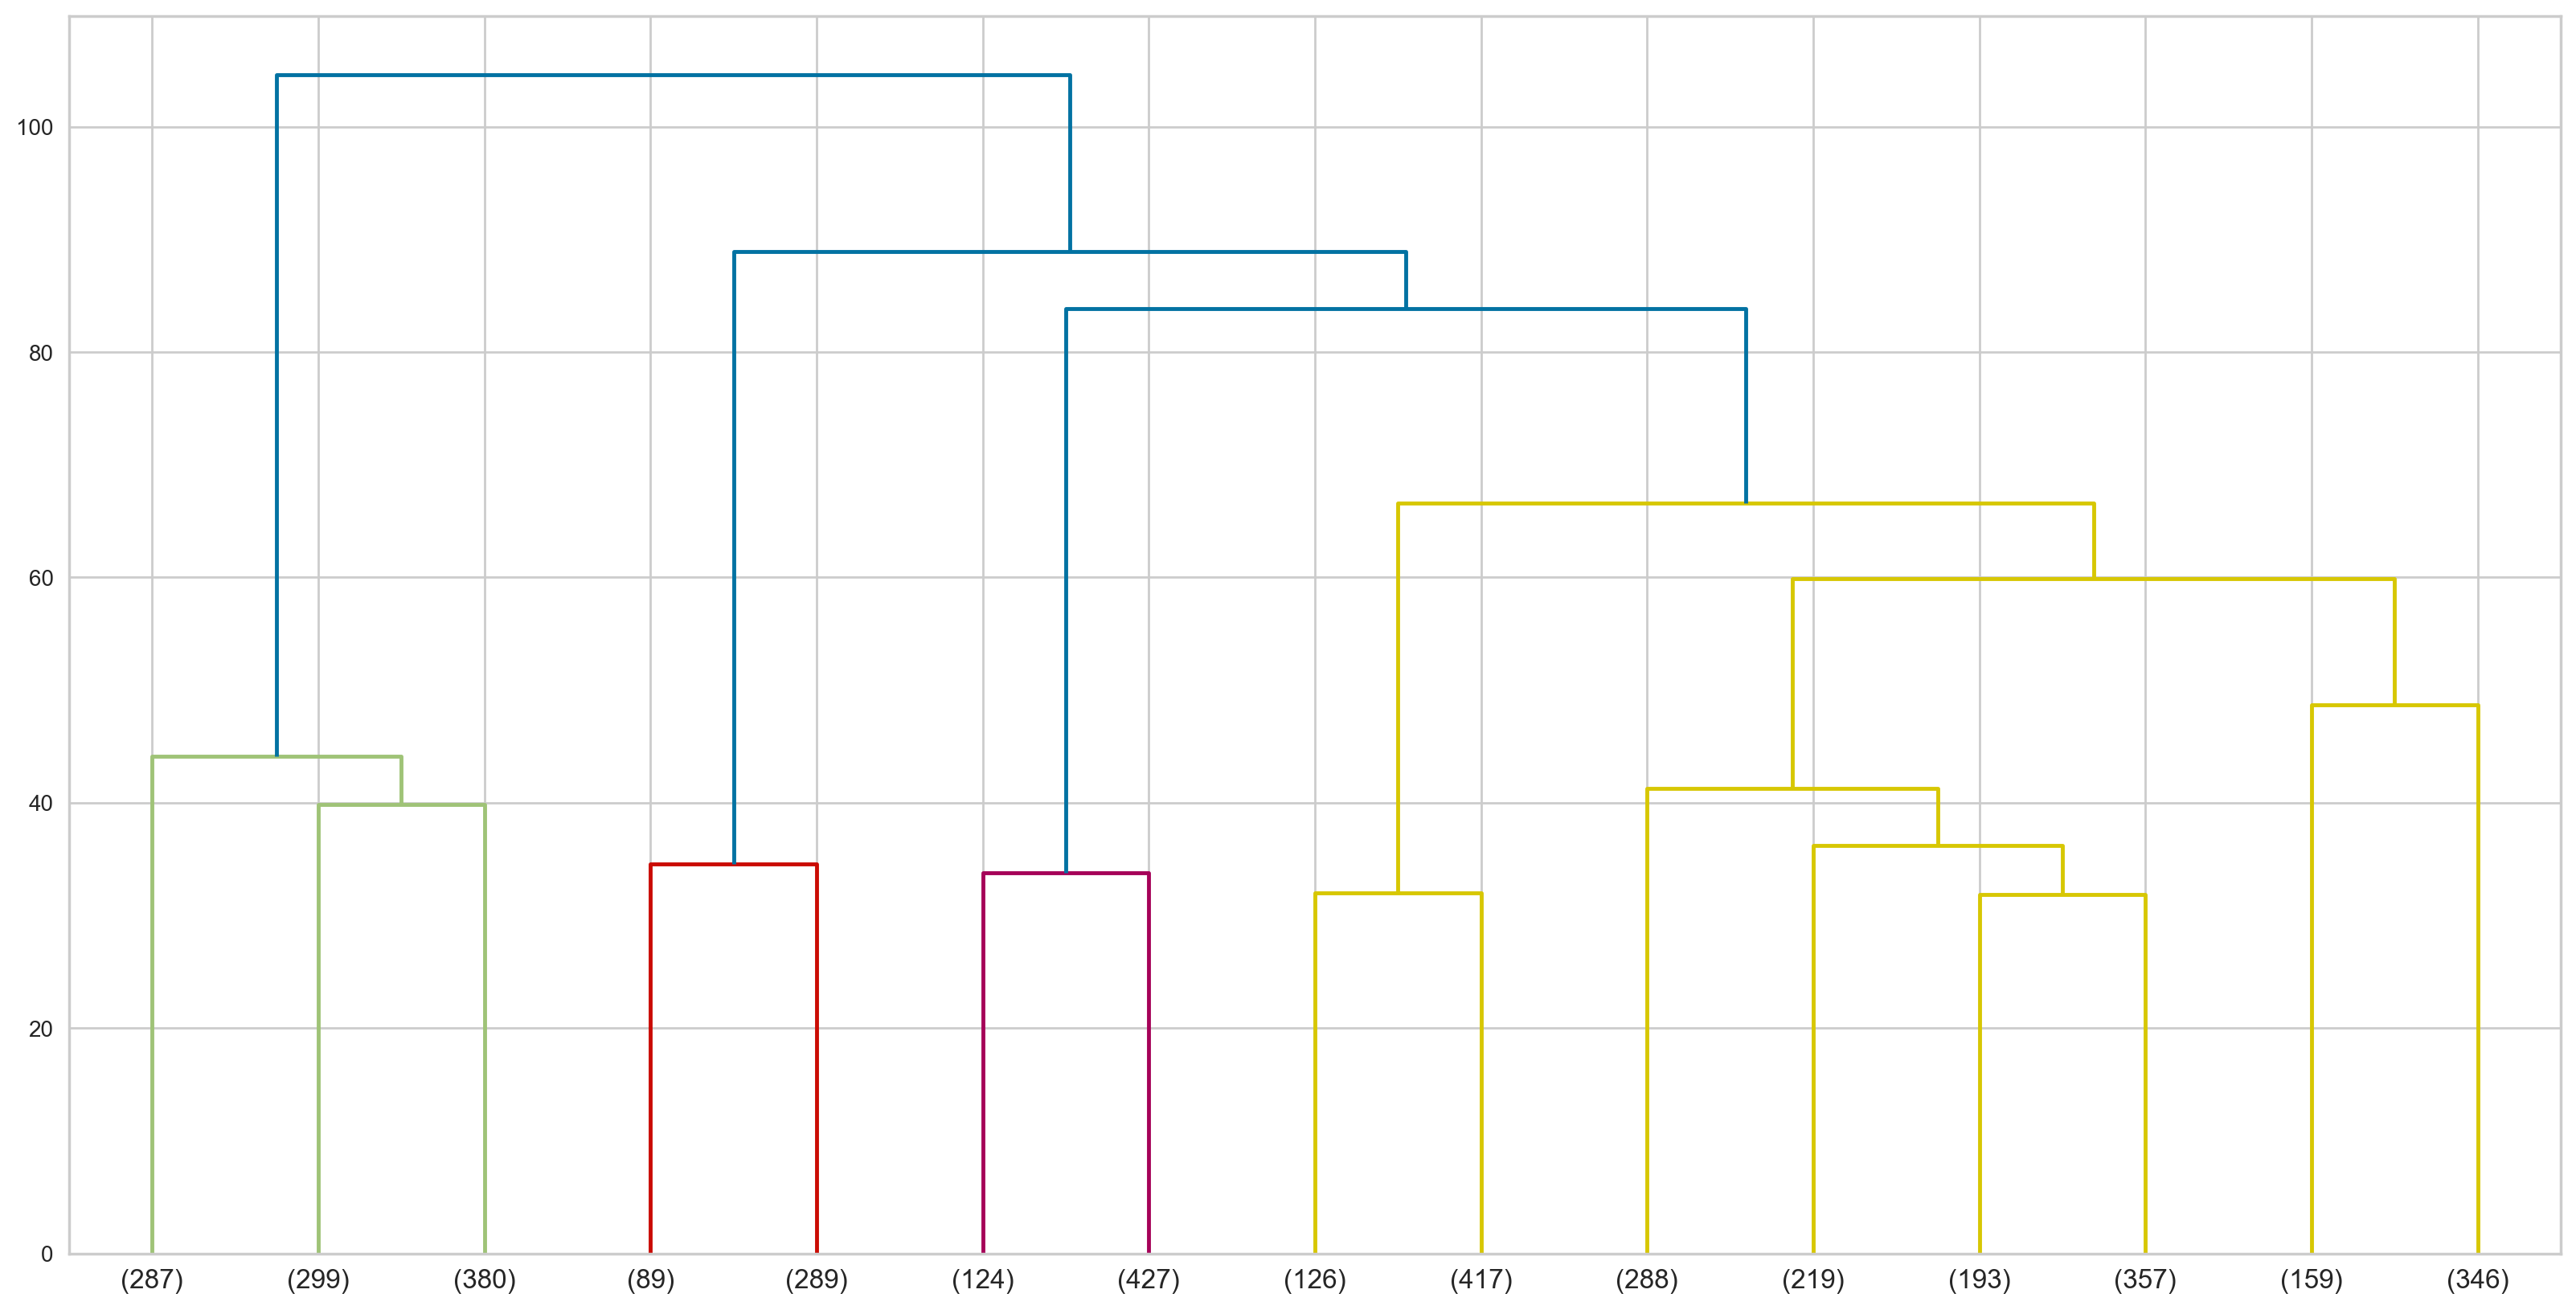

In [620]:
matrix = hierarchy.linkage(X_scaled, method='ward')
plt.figure(figsize=(20,10), dpi=200)
dendoro = dendrogram(matrix, truncate_mode='lastp',p=15)

В результате иерархической кластеризация было выделено 4 кластера. Далее, было произведено сравнение кластеров друг с другом, на основе средних значений признаков объектов каждого кластера. 
- В каждом кластере примерно половина мужчин и женщин;
- В первых 3 кластерах замечено высокое количество клиентов с близким расположением к клубу;
- Далее, в среднем, примерно половина людей каждого кластера являются сотрудниками компании партнера;
- Далее, во втором кластере по промо друзей пришло половина объектов, в остальных кластерах это меньшая часть;
- У третьего кластера ни у кого не указан телефон;
- Наибольшая средняя длительность текущего абонемента составляет у второго кластера в 10.7, в остальных кластерах это значение сильно меньше (в 2-4 раза);
- Групповые занятие посещает половина второго кластера, 40 процентов первого и третьего и 23 процента четвертого кластеров;
- В среднем, возраст объектов всех кластеров составляет 29 лет;
- Наибольший размер средних трат на дополнительные услуги замечен у второго кластера и составляет 164, наименьший - у четвертого, 136;
- Наибольшее среднее количество месяцев до окончания абонемента составляет примерно 10 у второго кластера;
- Время с момента первого обращения в фитнесцетр у всех кластеров примерно одинаковое, в районе 4;
- Средняя частота посещений в неделю за все время с начала действия абонемента у всех кластеров равна примерно 2;
- Наибольшая средняя частота посещений в неделю за предыдущий месяц наблюдается у второго кластера в размере 2, у остальных примерно 1.7.

In [622]:
agglomerative = AgglomerativeClustering(n_clusters=4)
agglo_clusters = agglomerative.fit_predict(X_scaled)
X['cluster'] = agglo_clusters

X.groupby('cluster').mean()

gender  Near_Location   Partner  Promo_friends   Phone  \
cluster                                                             
0        0.532542       0.992874  0.396200       0.287886  0.9962   
1        0.464803       1.000000  0.679089       0.479296  1.0000   
2        0.521164       0.859788  0.473545       0.309524  0.0000   
3        0.497278       0.000000  0.504537       0.087114  1.0000   

         Contract_period  Group_visits        Age  \
cluster                                             
0               2.333017      0.413302  29.036105   
1              10.731884      0.508282  29.722567   
2               4.640212      0.425926  29.283069   
3               3.072595      0.230490  28.738657   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster                                                                  
0                          142.427972               2.169121  3.715914   
1                          164.262405               9.818841  4.286749   
2                          142.593488               4.343915  3.714286   
3                          136.817074               2.900181  2.780399   

         Avg_class_frequency_total  Avg_class_frequency_current_month  
cluster                                                                
0                         1.825084                           1.687157  
1                         2.060995                           2.046680  
2                         1.861802                           1.729021  
3                         1.777848                           1.608128

Далее, были вычислены внутренние и внешние метрики качества. Для оценки внутренних метрик качества, была проведена кластеризация на 4, а для оценки внешних, была проведена кластеризация на 2, так как в изначальных данных только 2 класса целевой переменной.

In [624]:
from sklearn.metrics import *
from sklearn.metrics.cluster import adjusted_mutual_info_score

agglomerative2 = AgglomerativeClustering(n_clusters=2)
agglo_clusters_2 = agglomerative2.fit_predict(X_scaled)

agglomerative4 = AgglomerativeClustering(n_clusters=4)
agglo_clusters_4 = agglomerative4.fit_predict(X_scaled)

agglo_sil_score = silhouette_score(X_scaled, agglo_clusters_4)
print(f"Качество кластеризации по метрике Cилуэта: {agglo_sil_score:.3f}")

ADI_agglo = adjusted_mutual_info_score(y, agglo_clusters_2, average_method='arithmetic')
print(f"Качество кластеризации по метрике AMI: {ADI_agglo:.3f}")

metrics_val = {}
metrics_val = {
'ARI': adjusted_rand_score(y, agglo_clusters_2),
'FMI': fowlkes_mallows_score(y, agglo_clusters_2),
'Homogenity': homogeneity_score(y, agglo_clusters_2),
'Completeness': completeness_score(y, agglo_clusters_2),
'V-measure': v_measure_score(y, agglo_clusters_2)
}
for el in metrics_val.keys():
    print(f"{el}:{metrics_val[el]:.3f}")

Качество кластеризации по метрике Cилуэта: 0.140
Качество кластеризации по метрике AMI: 0.096
ARI:-0.062
FMI:0.598
Homogenity:0.094
Completeness:0.098
V-measure:0.096


В результате вычисления метрик качества, можно сделать следующие выводы:
- Низкое значение силуэта указывает на то, что кластеры частично пересекаются или объекты нечетко сгруппированы. Однако, значение выше, чем при кластеризации методом knn;
- ARI -0.062: кластеры распределены хуже, чем случайное разбиение. Наблюдается слабая связь между истинными метками и предсказанными кластерами;
- Самой высокой метрикой оказалась FMI (0.598): индекс Фаулкса-Мэллоуса говорит о приемлемой точности кластеризации, хотя полнота остается низкой. Возможно, модель хорошо группирует некоторые элементы, но значительная часть остается неправильно распределенной;
- Homogeneity (0.094): внутри кластеров содержатся смешанные классы;
- Completeness (0.098): элементы одного истинного класса не полностью сгруппированы в одном кластере;
- V-measure (0.096): Среднее гармоническое гомогенности и полноты остается низким, что подтверждает слабую кластеризацию с учетом баланса между этими метриками.

В целом, аггломеративная кластеризация показала более хороший результат на внутренних метриках, но уступает методу kmean в качестве на внешних.

### 6. Выполнить подсчёт 4 любых метрик для разного количества кластеров (от 2 до 10). Построить график - по оси х - кол-во кластеров, по у - значение метрики (отразить все 4 метрики на одном графике разным цветом).

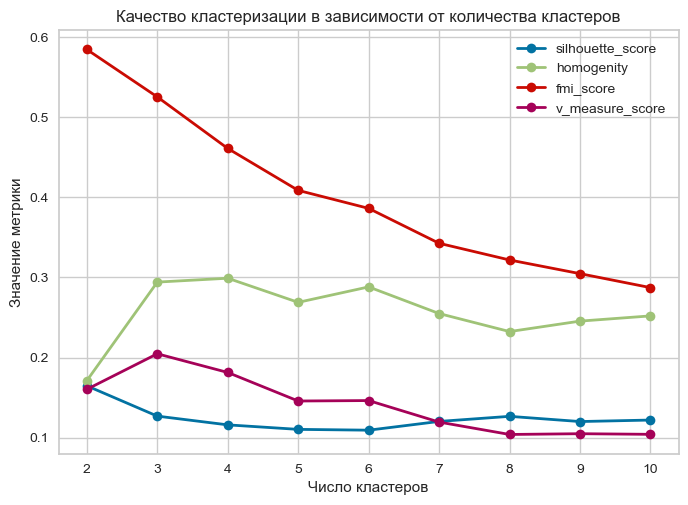

In [627]:
task6_metrics = {
    'n_clusters': [],
    'silhouette_score': [],
    'homogenity': [],
    'fmi_score': [],
    'v_measure_score': []
}

for i in range(2,11):
    model = KMeans(n_clusters=i, random_state=42)
    kmeans_labels = model.fit_predict(X_scaled)
    
    sil_score = silhouette_score(X_scaled, kmeans_labels)
    fmi_score = fowlkes_mallows_score(y, kmeans_labels)
    v_score = v_measure_score(y, kmeans_labels)
    homogeneity_sc = homogeneity_score(y, kmeans_labels)
    
    task6_metrics['n_clusters'].append(i)
    task6_metrics['silhouette_score'].append(sil_score)
    task6_metrics['homogenity'].append(homogeneity_sc)
    task6_metrics['fmi_score'].append(fmi_score)
    task6_metrics['v_measure_score'].append(v_score)

metrics_df = pd.DataFrame(task6_metrics)

for metric in ['silhouette_score', 'homogenity', 'fmi_score', 'v_measure_score']:
    plt.plot(metrics_df['n_clusters'], metrics_df[metric], label=metric, marker='o', linewidth=2)

plt.title('Качество кластеризации в зависимости от количества кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('Значение метрики')
plt.legend()
plt.grid(True)
plt.show()

В результате построения графика зависимости значения метрик от числа кластеров, можно сделать следующие выводы:
- Наилучшая метрика FMI с увеличением числа кластеров уменьшает свое значение, что может свидетельствовать о том, что увеличение количества кластеров приводит к менее качественному разделению данных;
- Одинаково низкими оказались значения метрик силуэта и v_measure, это показывает, что разбиение данных на кластеры не является оптимальным, независимо от числа кластеров. Это также может свидетельствовать о том, что алгоритм кластеризации не способен эффективно выделить структуру в данных;
- Между наилучшими и наихудшими значениями метрик оказалась однородность (homogenity): внутренние группы остаются примерно одинаковыми по качеству.